#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
plt.style.use("ggplot") 
import plotly.express as px




#Data Importing

In [2]:
data = pd.read_csv("heart.csv")

#Understand to Dataset - Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#Data Preprocessing

<AxesSubplot:>

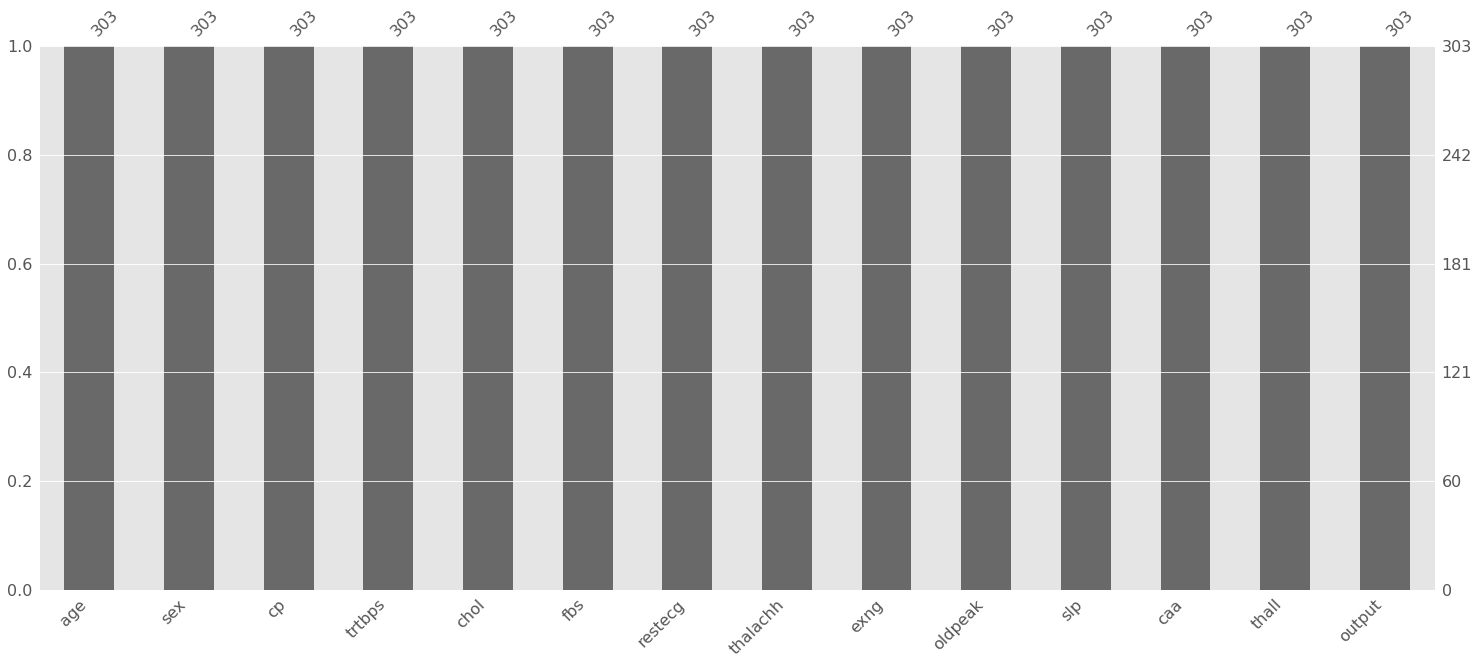

In [6]:
msno.bar(data)

c:\Users\w10\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

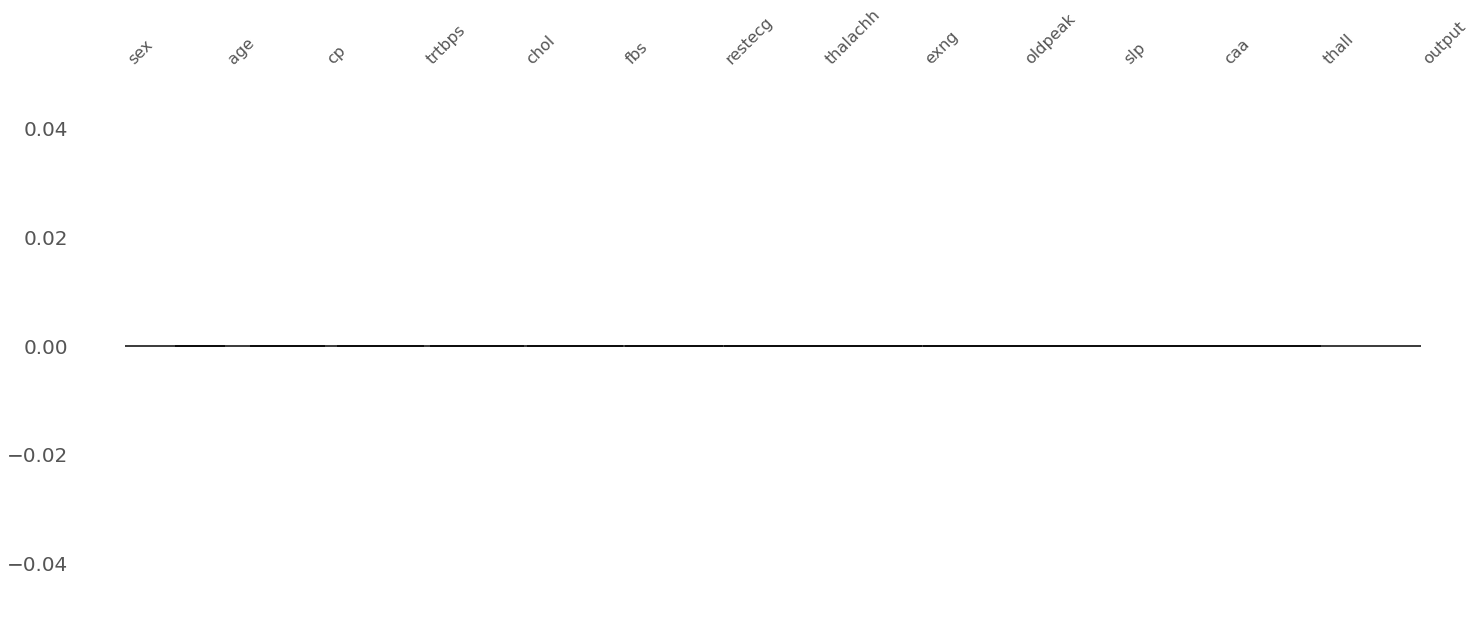

In [7]:
msno.dendrogram(data)

<AxesSubplot:>

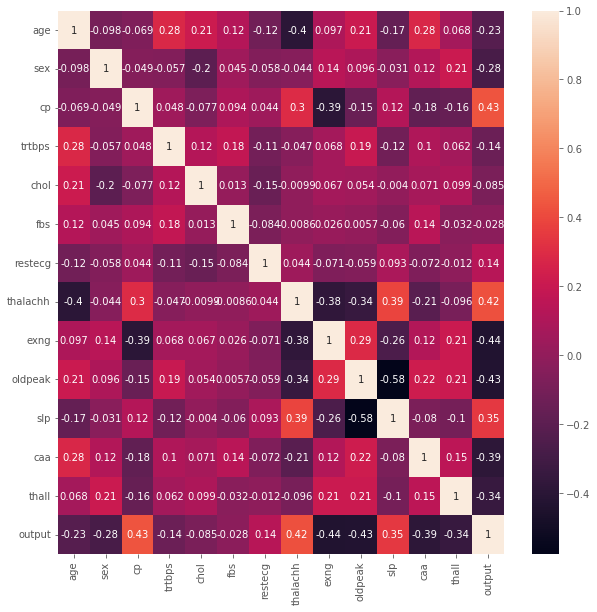

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

#Check Duplicate Values

In [9]:
data.duplicated().any()

True

In [10]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#Drop Duplicate Values

In [11]:
data.drop_duplicates(keep='first',inplace=True)

#Check NA Values

In [12]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#Find Age range of Dataset

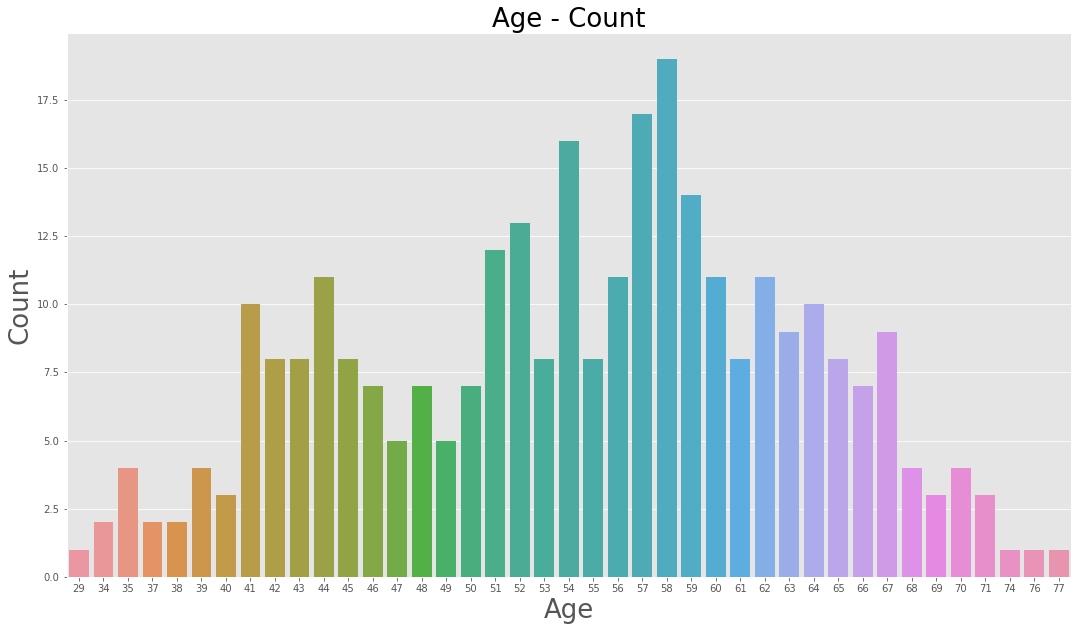

In [13]:
plt.figure(figsize=(18,10) )
sns.countplot(x=data["age"])
plt.title("Age - Count",fontsize=26)
plt.xlabel("Age",fontsize=26)
plt.ylabel("Count",fontsize=26)
plt.show()

#Chest Pain Count

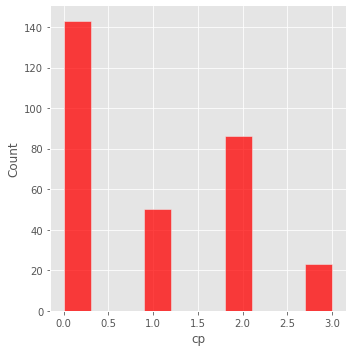

In [14]:
sns.displot(data , x="cp" , color="red")

#Relation Between Chest Pain - Age

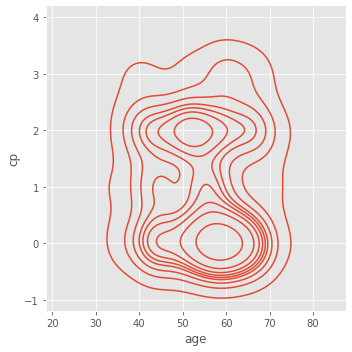

In [15]:
sns.displot(data, x="age" , y="cp" , kind="kde")

#Relation Between Reached Heart Rate - Chest Pain - Sex

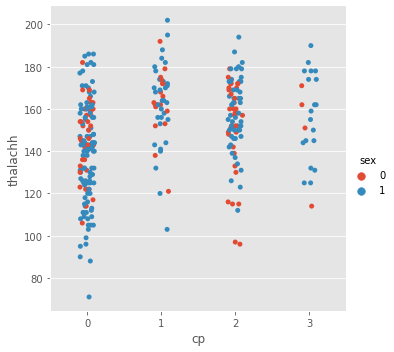

In [16]:
sns.catplot(x="cp",y="thalachh" ,hue="sex", data=data)

In [17]:
figure1 = px.scatter(data,x="age",y="chol",color="output",title="Influence Age and cholesterol")
figure1.show()


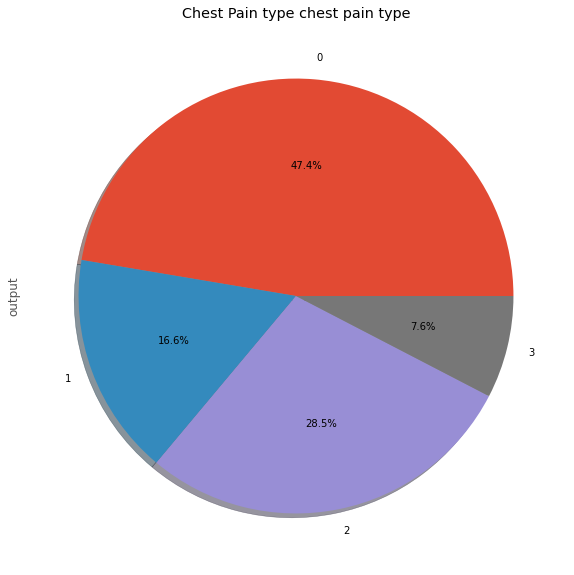

In [18]:
data.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type chest pain type")
plt.show()

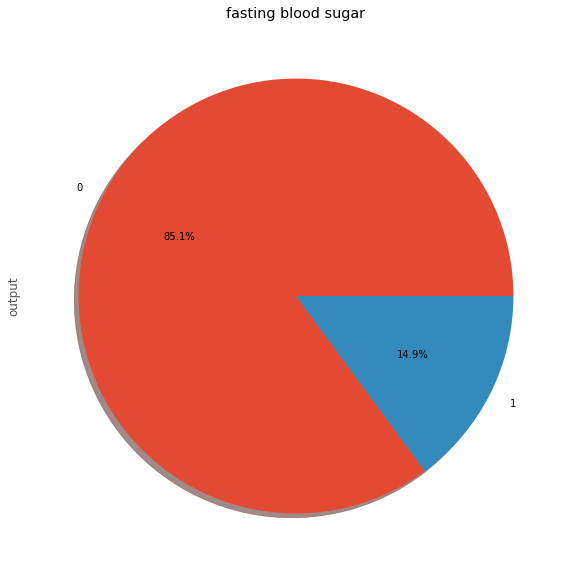

In [19]:
data.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")
plt.show()


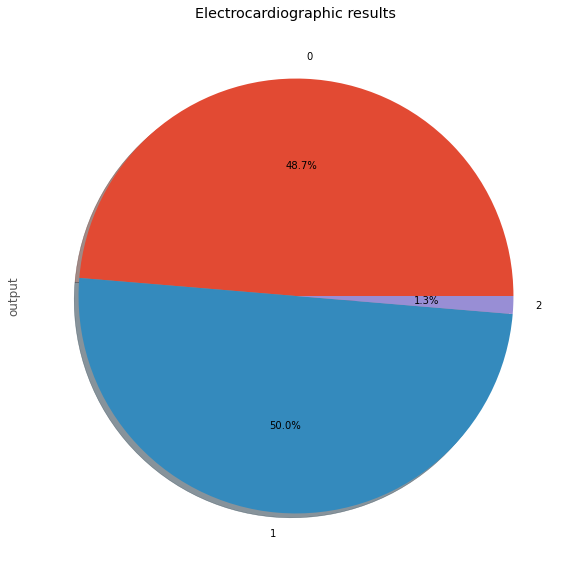

In [20]:
data.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Electrocardiographic results")
plt.show()

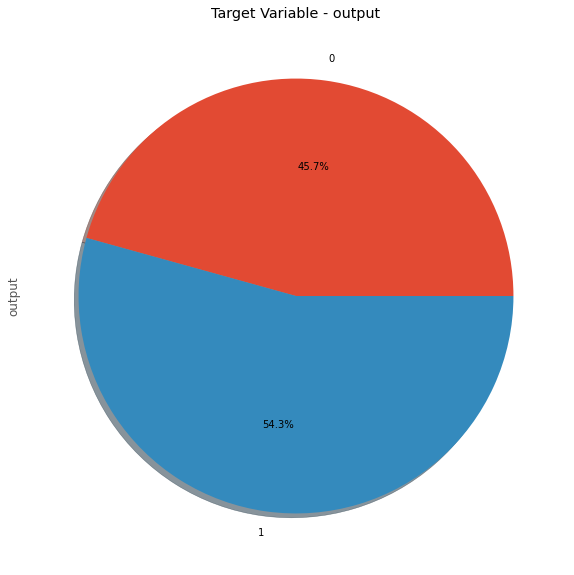

In [21]:
data.groupby('output')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Target Variable - output")
plt.show()

#Data Prepearing

In [22]:
X = data.drop(columns="output")           
y = data["output"]   

#Splitting Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Fitting Data


In [24]:
sc = StandardScaler()
sc.fit(X_train)
StandardScaler(copy= True,with_mean= True, with_std= True )
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Perceptron 

In [25]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred_ppn = ppn.predict(X_test_std)
print('Accuracy of Perceptron:', accuracy_score(y_test, y_pred_ppn) * 100, "%\n")
perceptron_score = round(accuracy_score(y_test, y_pred_ppn) * 100 , 2)

cm = confusion_matrix(y_test,y_pred_ppn)

sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")

plt.xlabel("Predict")

plt.ylabel("Actual")


Accuracy of Perceptron: 77.63157894736842 %



NameError: name 'confusion_matrix' is not defined

#Logistic Regression

Accuracy of Logistic Regression: 84.21052631578947 %



Text(33.0, 0.5, 'Actual')

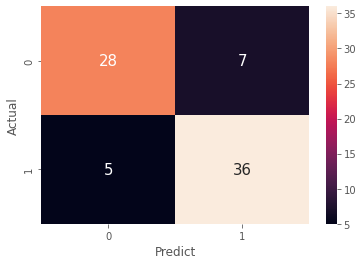

In [ ]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
y_pred_logistic = LR.predict(X_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred_logistic) * 100, "%\n")
logreg_score = round(accuracy_score(y_test, y_pred_logistic) * 100 ,2)

cm = confusion_matrix(y_test,y_pred_logistic)

sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")

plt.xlabel("Predict")

plt.ylabel("Actual")

#Decision Tree 

Accuracy of Decision Tree:  80.26315789473685 %



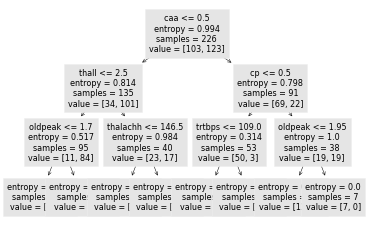

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth= 3,random_state = 0)
tree.fit(X_train, y_train)
plot_tree(tree, feature_names = data.columns ,fontsize = 8)
y_pred_tree = tree.predict(X_test)
print("Accuracy of Decision Tree: ", accuracy_score(y_test, y_pred_tree) * 100, "%\n")
decisiontree_score = round(accuracy_score(y_test, y_pred_tree) * 100,2)




#GINI IMPURITY

Gini Accuracy  :  81.57894736842105 %


Text(33.0, 0.5, 'Actual')

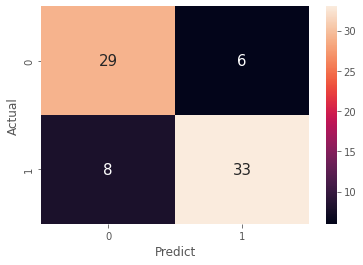

In [ ]:
tree_gin = DecisionTreeClassifier(criterion = 'gini',max_depth =  4, random_state =  0 )
tree_gin.fit(X_train, y_train)
y_pred_test_gin  = tree_gin.predict(X_test)
gini_score = round(accuracy_score(y_test, y_pred_test_gin) * 100 ,2)

gini_score
print("Gini Accuracy  : ", accuracy_score(y_test, y_pred_test_gin) * 100, "%")
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test,y_pred_test_gin)
from sklearn.metrics import accuracy_score

sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")

plt.xlabel("Predict")

plt.ylabel("Actual")


#ENTROPY IMPURITY

Entropy Accuracy  :  81.57894736842105 %



Text(33.0, 0.5, 'Actual')

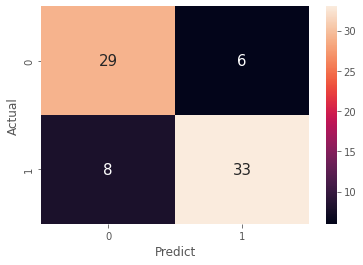

In [ ]:
tree_ent = DecisionTreeClassifier(criterion = 'entropy', max_depth =4,random_state =  0 )
tree_ent.fit(X_train, y_train)
y_pred_test_ent  = tree_ent.predict(X_test)
entropy_score = round(accuracy_score(y_test, y_pred_test_ent) * 100,2)


print("Entropy Accuracy  : ", accuracy_score(y_test, y_pred_test_ent) * 100, "%\n")
cm = confusion_matrix(y_test,y_pred_test_ent)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")

plt.xlabel("Predict")

plt.ylabel("Actual")


#RANDOM FOREST


Accuracy of Random Forest: 86.8421052631579% %



Text(33.0, 0.5, 'Actual')

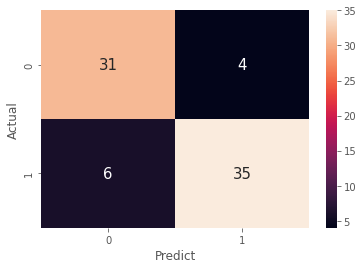

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_predictions[0:10]
y_test[0:10]
print("Accuracy of Random Forest: {}%".format(forest.score(X_test, y_test) * 100 ), "%\n")
randomf_score = round(forest.score(X_test, y_test) * 100 ,2)

cm = confusion_matrix(y_test,forest_predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")


#SVC


Accuracy of SVC:  85.52631578947368 %



Text(33.0, 0.5, 'Actual')

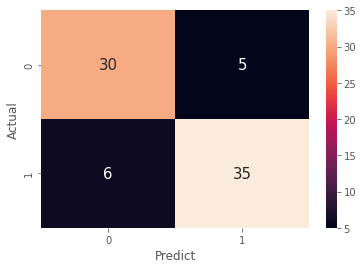

In [ ]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train, y_train)
y_svm_test = svm.predict(X_test)
print("Accuracy of SVC: ", accuracy_score(y_test, y_svm_test) * 100, "%\n")
svc_score = round(accuracy_score(y_test, y_svm_test) * 100 ,2)

cm = confusion_matrix(y_test,y_svm_test)

sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

#COMPARE ALL MODEL SCORE


In [ ]:
CompareModels = pd.DataFrame({
    'model' : [ 'Perceptron' , 'Logistic Regression' , 'Decision Tree' ,
    'Gini Impurity ' , 'Entropy Impurity' , 'Random Forest' , 'SVC' ] ,
    'score' : [  perceptron_score ,logreg_score , decisiontree_score , gini_score , entropy_score,
    randomf_score, svc_score
    ]  } )


In [ ]:
CompareModels.sort_values(by='score' , ascending =False )

,model,score
5,Random Forest,86.84
6,SVC,85.53
1,Logistic Regression,84.21
3,Gini Impurity,81.58
4,Entropy Impurity,81.58
2,Decision Tree,80.26
0,Perceptron,77.63


[Text(0.5, 1.0, 'Score vs Model')]

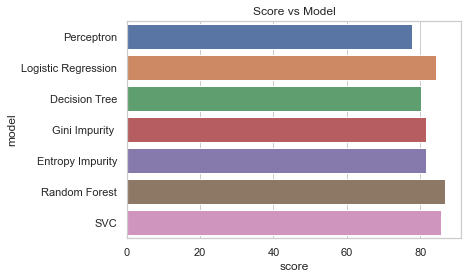

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='score' , y='model' , data=CompareModels).set(title='Score vs Model')
